# Test extension of small/large cavities
NB large ones can be too small to split also

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from icedyn1d.mesh import Mesh

In [2]:
def plot_labelled_nodes(xo, xn, include):
    ninds = np.arange(len(xn), dtype=int)
    plt.plot(xn, ninds, '-or', label='old')
    plt.plot(xo, ninds, '-.k', label='new')
    
    split = Mesh.split_cavities(include)
    leg_text = 'cavity'
    for inc, label in split:
        if not label:
            continue
        n_inc = np.zeros_like(xn, dtype=bool)
        n_inc[:-1][inc] = True
        n_inc[1:][inc] = True
        plt.plot(xn[n_inc], ninds[n_inc], ':^b', label=leg_text)
        leg_text=None
    plt.legend()
    return
    n_inc = np.zeros_like(xn, dtype=bool)
    n_inc[:-1][include] = True
    n_inc[1:][include] = True
    plt.plot(xn[n_inc], ninds[n_inc], ':^b', label='cavity')
    plt.legend()

## One small element
NB same as "one large" and "one large, one small"

0.5
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0.  1.  2.  3.  3.2 5.  6.  7.  8.  9. ]
[1.  1.  1.  0.2 1.8 1.  1.  1.  1. ]
[False False False  True False False False False False]
[False False False  True  True False False False False]


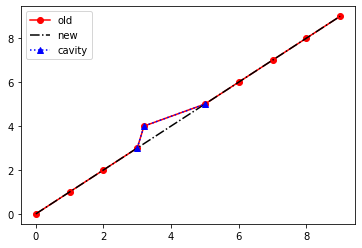

In [3]:
x = np.arange(10, dtype=float)
m = Mesh(x)
print(m.hmin)
um = np.zeros_like(x)
um[4]=-.8
m.move(um)
print(x, m.nodes_x, sep='\n')
widths = m.get_widths()
remesh = (widths<m.hmin) #don't use full criteria
print(widths, remesh, sep='\n')
remesh = m.extend_small_cavities(remesh)
print(remesh)
plot_labelled_nodes(x, m.nodes_x, remesh)

## One large element
NB same as "one small" and "one large, one small"

0.5
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0.  1.  2.  3.  3.2 5.  6.  7.  8.  9. ]
[1.  1.  1.  0.2 1.8 1.  1.  1.  1. ]
[False False False False  True False False False False]
[False False False  True  True False False False False]


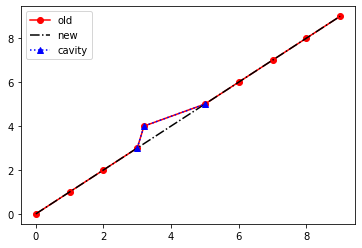

In [4]:
x = np.arange(10, dtype=float)
m = Mesh(x)
print(m.hmin)
um = np.zeros_like(x)
um[4]=-.8
m.move(um)
print(x, m.nodes_x, sep='\n')
widths = m.get_widths()
remesh = (widths>m.hmax) #don't use full criteria
print(widths, remesh, sep='\n')
remesh = m.extend_small_cavities(widths>m.hmax)
print(remesh)
plot_labelled_nodes(x, m.nodes_x, remesh)

## One large, one small element
NB same as "one large" and "one small"

0.5
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0.  1.  2.  3.  3.2 5.  6.  7.  8.  9. ]
[1.  1.  1.  0.2 1.8 1.  1.  1.  1. ]
[False False False  True  True False False False False]
[False False False  True  True False False False False]


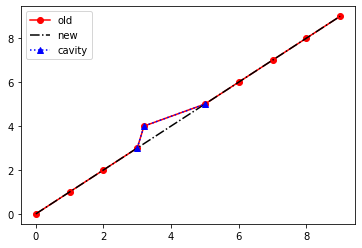

In [5]:
x = np.arange(10, dtype=float)
m = Mesh(x)
print(m.hmin)
um = np.zeros_like(x)
um[4]=-.8
m.move(um)
print(x, m.nodes_x, sep='\n')
widths = m.get_widths()
remesh = (widths<m.hmin) + (widths>m.hmax)
print(widths, remesh, sep='\n')
remesh = m.extend_small_cavities(remesh)
print(remesh)
plot_labelled_nodes(x, m.nodes_x, remesh)

## One end element

0.5
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0.8 1.  2.  3.  4.  5.  6.  7.  8.  9. ]
[ True  True  True False False False False False False]


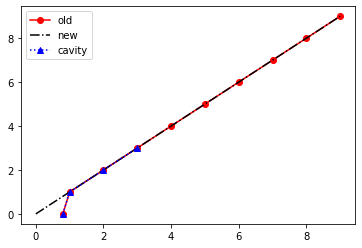

In [6]:
x = np.arange(10, dtype=float)
m = Mesh(x)
print(m.hmin)
um = np.zeros_like(x)
um[0]=.8
m.move(um)
print(x, m.nodes_x, sep='\n')
widths = m.get_widths()
remesh = (widths<m.hmin) + (widths>m.hmax)
remesh = m.extend_small_cavities(remesh)
print(remesh)
plot_labelled_nodes(x, m.nodes_x, remesh)

## Other end element

0.5
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0.  1.  2.  3.  4.  5.  6.  7.  8.  8.2]
[1.  1.  1.  1.  1.  1.  1.  1.  0.2]
[False False False False False False False False  True]
[False False False False False False  True  True  True]


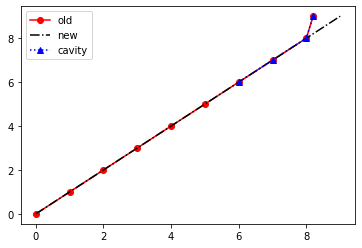

In [7]:
x = np.arange(10, dtype=float)
m = Mesh(x)
print(m.hmin)
um = np.zeros_like(x)
um[-1]=-.8
m.move(um)
print(x, m.nodes_x, sep='\n')
widths = m.get_widths()
remesh = (widths<m.hmin) + (widths>m.hmax)
print(widths, remesh, sep='\n')
remesh = m.extend_small_cavities(remesh)
print(remesh)
plot_labelled_nodes(x, m.nodes_x, remesh)

## Multiple cavities

0.5
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0.  1.  2.  2.2 4.  5.  6.  7.  8.  8.2]
[1.  1.  0.2 1.8 1.  1.  1.  1.  0.2]
[False False  True  True False False False False  True]
[False False  True  True False False  True  True  True]


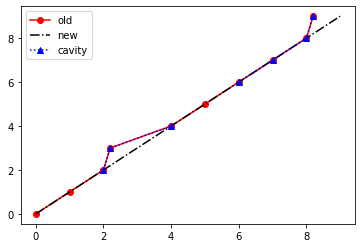

In [8]:
x = np.arange(10, dtype=float)
m = Mesh(x)
print(m.hmin)
um = np.zeros_like(x)
um[3]=-.8
um[-1]=-.8
m.move(um)
print(x, m.nodes_x, sep='\n')
widths = m.get_widths()
remesh = (widths<m.hmin) + (widths>m.hmax)
print(widths, remesh, sep='\n')
remesh = m.extend_small_cavities(remesh)
print(remesh)
plot_labelled_nodes(x, m.nodes_x, remesh)

0.5
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0.8 1.  2.  2.2 4.  5.  6.  7.  8.  9. ]
[0.2 1.  0.2 1.8 1.  1.  1.  1.  1. ]
[ True False  True  True False False False False False]
[ True  True  True  True False False False False False]


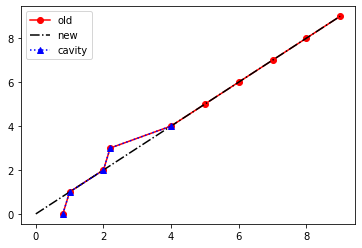

In [9]:
x = np.arange(10, dtype=float)
m = Mesh(x)
print(m.hmin)
um = np.zeros_like(x)
um[3]=-.8
um[0]=.8
m.move(um)
print(x, m.nodes_x, sep='\n')
widths = m.get_widths()
remesh = (widths<m.hmin) + (widths>m.hmax)
print(widths, remesh, sep='\n')
remesh = m.extend_small_cavities(remesh)
print(remesh)
plot_labelled_nodes(x, m.nodes_x, remesh)

0.5
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0.8 1.  1.2 3.  4.  5.  6.  7.  8.  9. ]
[0.2 0.2 1.8 1.  1.  1.  1.  1.  1. ]
[ True  True  True False False False False False False]
[ True  True  True False False False False False False]


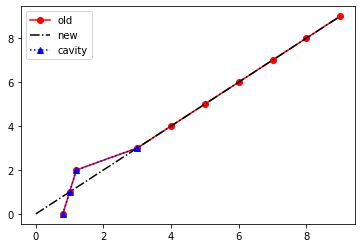

In [10]:
x = np.arange(10, dtype=float)
m = Mesh(x)
print(m.hmin)
um = np.zeros_like(x)
um[2]=-.8
um[0]=.8
m.move(um)
print(x, m.nodes_x, sep='\n')
widths = m.get_widths()
remesh = (widths<m.hmin) + (widths>m.hmax)
print(widths, remesh, sep='\n')
remesh = m.extend_small_cavities(remesh)
print(remesh)
plot_labelled_nodes(x, m.nodes_x, remesh)